## Access to Special Healthcare Services Among Children

Access to specialized healthcare services is a critical aspect of ensuring the well-being of children, particularly those with chronic conditions or disabilities. However, disparities in healthcare access can significantly impact health outcomes, creating challenges for families seeking appropriate care for their children. This capstone project aims to leverage data from  National Survey of Children's Health (NSCH) to shed light on the sociodemographic characteristics of children facing special healthcare needs.

### Getting Started:
The project will utilize the comprehensive dataset of the NSCH from years 2016-2021, a nationally representative survey encompassing information on the health and well-being of over 200k+ children. By focusing on children with special healthcare needs, chronic conditions, and exploring factors such as public insurance coverage, the analysis will delve into the barriers faced by parents in accessing specialized healthcare services for their children.

### Project Approach:
By observing and analyzing trends over the years, the project will unveil the dynamics of how access to specialized healthcare services has evolved. This temporal perspective allows for a nuanced understanding of any changes or persistent challenges in healthcare access for children with special needs.



In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
import time
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/data_consolidated.csv')
df.head()

,HHID,FIPSST,STRATUM,FORMTYPE,TOTKIDS_R,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,MOMAGE,LIVEUSA_YR,...,rxmeds,serve,func,therapy,mhealth,qualnum,CSHCN,CSHCNtype,CSHCNComplex,mhneeds
0,16000030,18,1,1,1,1,2,1,28,95,...,2,2,2,2,2,0,2,0,3,3
1,16000032,17,1,2,1,1,9,1,40,95,...,1,1,2,1,1,4,1,4,1,1
2,16000050,50,1,2,1,1,11,1,28,95,...,2,2,2,2,2,0,2,0,3,3
3,16000051,51,1,2,3,1,10,2,37,95,...,2,2,2,2,2,0,2,0,3,3
4,16000090,53,1,3,1,1,15,2,30,95,...,2,2,2,2,2,0,2,0,3,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225443 entries, 0 to 225442
Data columns (total 39 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   HHID          225443 non-null  int64
 1   FIPSST        225443 non-null  int64
 2   STRATUM       225443 non-null  int64
 3   FORMTYPE      225443 non-null  int64
 4   TOTKIDS_R     225443 non-null  int64
 5   HHLANGUAGE    225443 non-null  int64
 6   SC_AGE_YEARS  225443 non-null  int64
 7   SC_SEX        225443 non-null  int64
 8   MOMAGE        225443 non-null  int64
 9   LIVEUSA_YR    225443 non-null  int64
 10  LIVEUSA_MO    225443 non-null  int64
 11  HHCOUNT       225443 non-null  int64
 12  FAMCOUNT      225443 non-null  int64
 13  SC_CSHCN      225443 non-null  int64
 14  SC_K2Q10      225443 non-null  int64
 15  SC_K2Q11      225443 non-null  int64
 16  SC_K2Q12      225443 non-null  int64
 17  SC_K2Q13      225443 non-null  int64
 18  SC_K2Q14      225443 non-null  int64
 19  SC

In [4]:
# Find missing values in each column
missing_values = df.isnull().sum()

# Check and print the results
missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("######################################")
    print("No missing values in the dataset")
    print("######################################")
else:
    print("######################################")
    print("Columns with missing values:")
    print(missing_columns)
    print("######################################")

# Get the non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number'])
print("\n")
print("######################################")
print("Non numeric columns in dataset" , len(non_numeric_columns.columns) , "non-numeric columns")
print("######################################")

print("\n")
# Describing the data
print("########################  Describing the data ###########################")
print(df.describe().T)
print("#########################################################################")

print("\n")
print("########################  Removing the duplicate columns - 'CSHCN' ###########################")
print((df['CSHCN'] == df['SC_CSHCN']).value_counts())


# Dropping year as this YEAR has only 2016

columns_to_drop = ['CSHCN']  

df = df.drop(columns=columns_to_drop)

print("####################################################################################################################")


######################################
No missing values in the dataset
######################################


######################################
Non numeric columns in dataset 0 non-numeric columns
######################################


########################  Describing the data ###########################
                 count          mean           std         min         25%  \
HHID          225443.0  1.877563e+07  1.863268e+06  16000030.0  17047932.5   
FIPSST        225443.0  2.924999e+01  1.571184e+01         1.0        16.0   
STRATUM       225443.0  1.069893e+00  2.549680e-01         1.0         1.0   
FORMTYPE      225443.0  2.079284e+00  8.344768e-01         1.0         1.0   
TOTKIDS_R     225443.0  1.853506e+00  8.672497e-01         1.0         1.0   
HHLANGUAGE    225443.0  1.631184e+00  7.164125e+00         1.0         1.0   
SC_AGE_YEARS  225443.0  9.152203e+00  5.260430e+00         0.0         4.0   
SC_SEX        225443.0  1.482477e+00  4.996939e-01      

In [5]:
print("\n")
# Understanding if there is any imbalance in the target variable
print("##########################  Class Imbalance of Target variable  ############################")
print(df['SC_CSHCN'].value_counts() ,  '  And the ratio is  ' , (df['SC_CSHCN'] == 1).sum()/(df['SC_CSHCN'] == 2).sum())
print("#############################################################################################")



##########################  Class Imbalance of Target variable  ############################
2    173926
1     51517
Name: SC_CSHCN, dtype: int64   And the ratio is   0.29620068304911285
#############################################################################################


Shape before deleting the duplicates from dataset (225443, 38)
Shape after deleting the duplicates from dataset (225443, 38)


################## Correlation of the matrix ####################


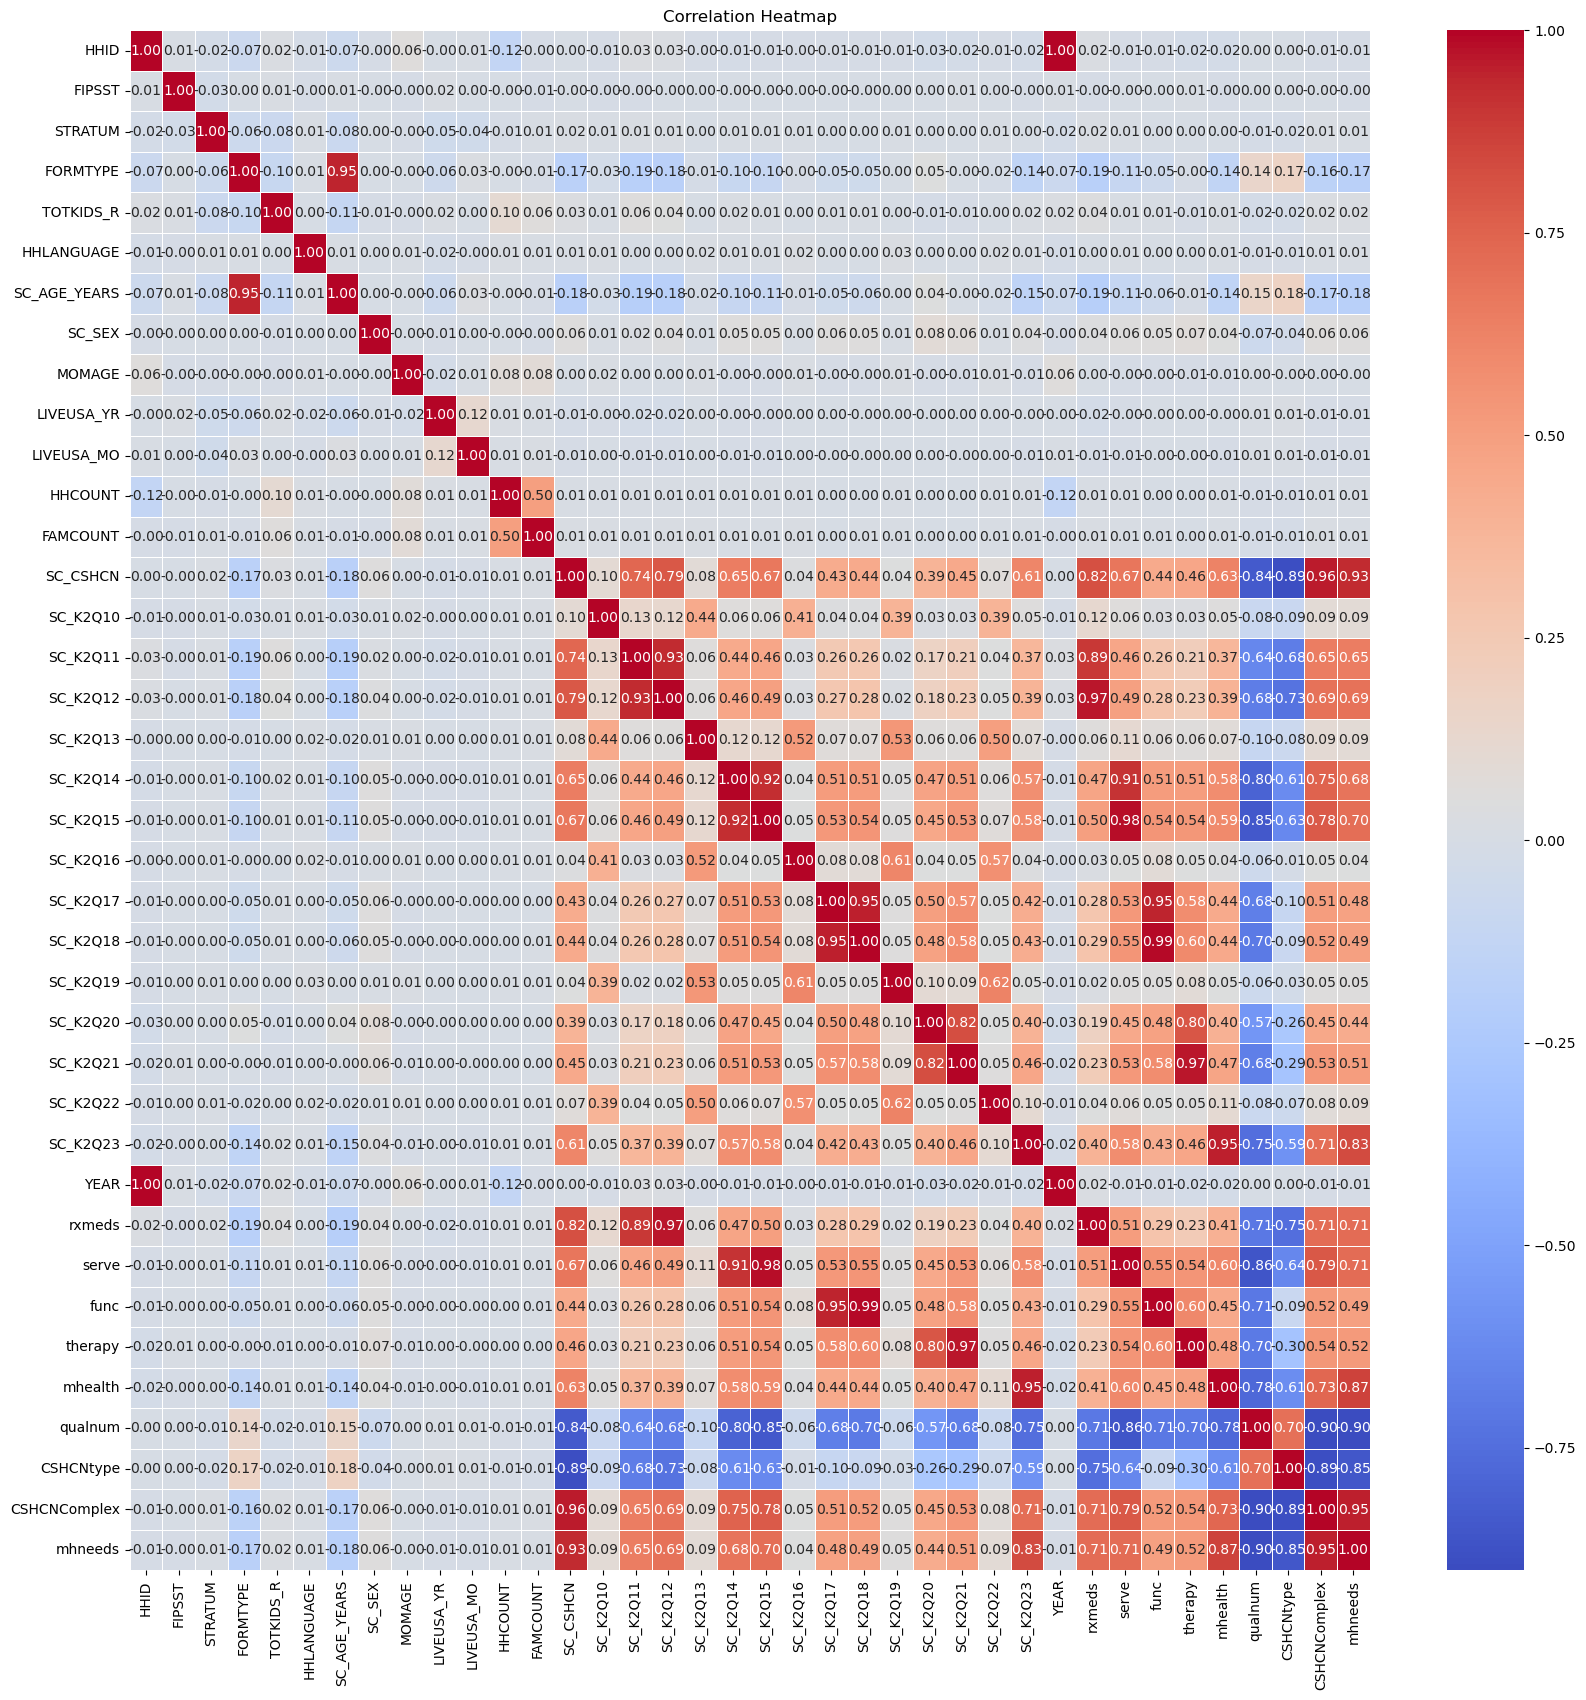

In [6]:
print("Shape before deleting the duplicates from dataset", df.shape)
df.drop_duplicates(inplace=True)
print("Shape after deleting the duplicates from dataset", df.shape)

print("\n")
print("################## Correlation of the matrix ####################")
cormat=df.corr(numeric_only=True)
# Create a heatmap
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(cormat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [25]:
# Count the affected children for each year
df_year_counts = df['YEAR'].value_counts().sort_index()
affected_children = df[df['SC_CSHCN'] == 1]
affected_children_counts = affected_children['YEAR'].value_counts().sort_index()

# Calculate the percentages
percentage_affected_children = (affected_children_counts / df_year_counts) * 100

# Calculate boy and girl percentages
affected_children_gender_counts = affected_children.groupby(['YEAR', 'SC_SEX']).size().unstack(fill_value=0)
percentage_boys = (affected_children_gender_counts[1] / affected_children_counts) * 100
percentage_girls = (affected_children_gender_counts[2] / affected_children_counts) * 100


# Create a table using pandas DataFrame
table_data = pd.DataFrame({
    'Year': df_year_counts.index,
    'Total Number of Children': df_year_counts.values,
    'Number of Affected Children': affected_children_counts.values,
    'Percentage of Affected Children': percentage_affected_children.values,
    'Percentage of Boys': percentage_boys.values,
    'Percentage of Girls': percentage_girls.values
})


# Display the table
print(table_data)

   Year  Total Number of Children  Number of Affected Children  \
0  2016                     50212                        11392   
1  2017                     21599                         4912   
2  2018                     30530                         6976   
3  2019                     29433                         7021   
4  2020                     42777                        10044   
5  2021                     50892                        11172   

   Percentage of Affected Children  Percentage of Boys  Percentage of Girls  
0                        22.687804           56.460674            43.539326  
1                        22.741794           56.229642            43.770358  
2                        22.849656           57.282110            42.717890  
3                        23.854177           56.971941            43.028059  
4                        23.479907           56.680605            43.319395  
5                        21.952370           57.142857            42.

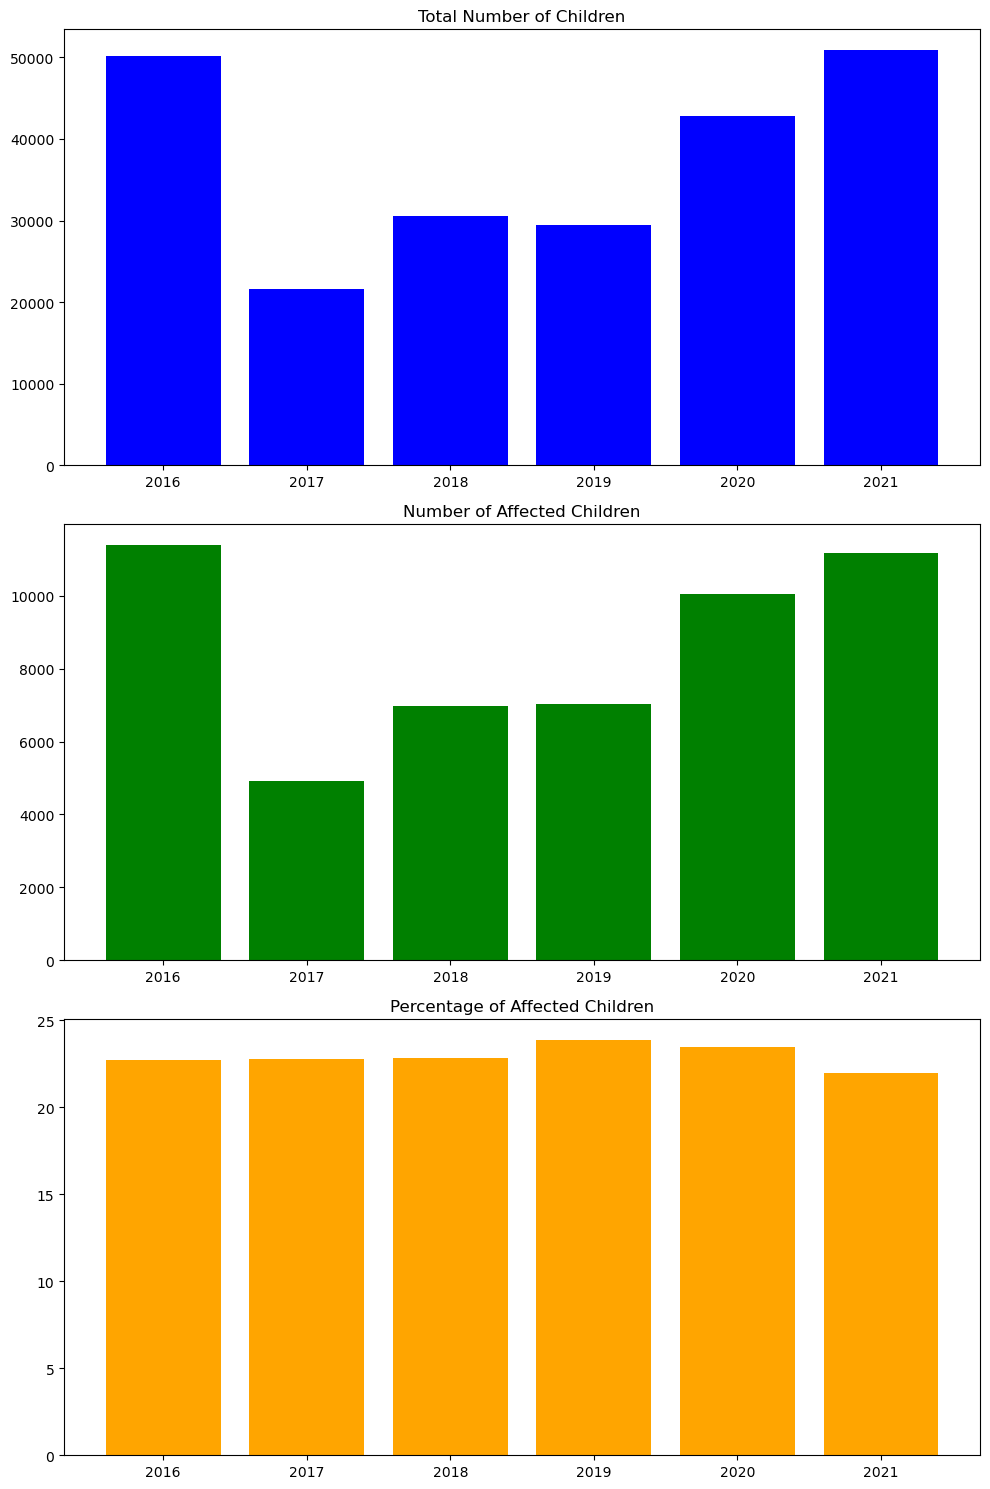

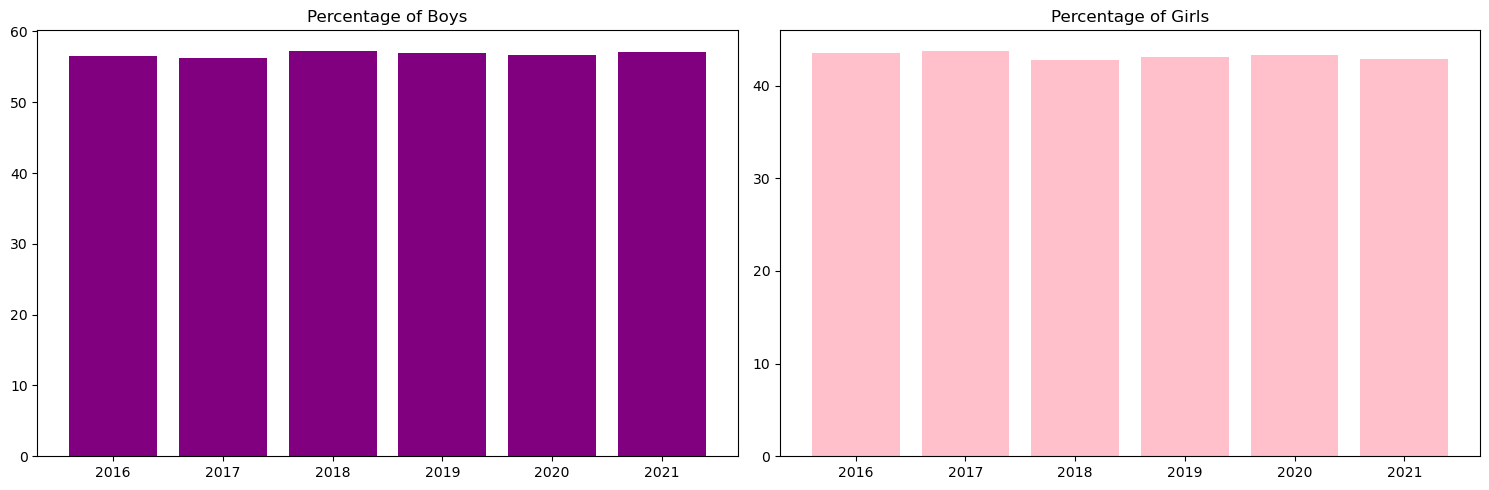

In [26]:
import matplotlib.pyplot as plt

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot Total Number of Children
axes[0].bar(table_data['Year'], table_data['Total Number of Children'], color='blue')
axes[0].set_title('Total Number of Children')

# Plot Number of Affected Children
axes[1].bar(table_data['Year'], table_data['Number of Affected Children'], color='green')
axes[1].set_title('Number of Affected Children')

# Plot Percentage of Affected Children
axes[2].bar(table_data['Year'], table_data['Percentage of Affected Children'], color='orange')
axes[2].set_title('Percentage of Affected Children')

# Adjust layout
plt.tight_layout()
plt.show()

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot Percentage of Boys
axes[0].bar(table_data['Year'], table_data['Percentage of Boys'], color='purple')
axes[0].set_title('Percentage of Boys')

# Plot Percentage of Girls
axes[1].bar(table_data['Year'], table_data['Percentage of Girls'], color='pink')
axes[1].set_title('Percentage of Girls')

# Adjust layout
plt.tight_layout()
plt.show()


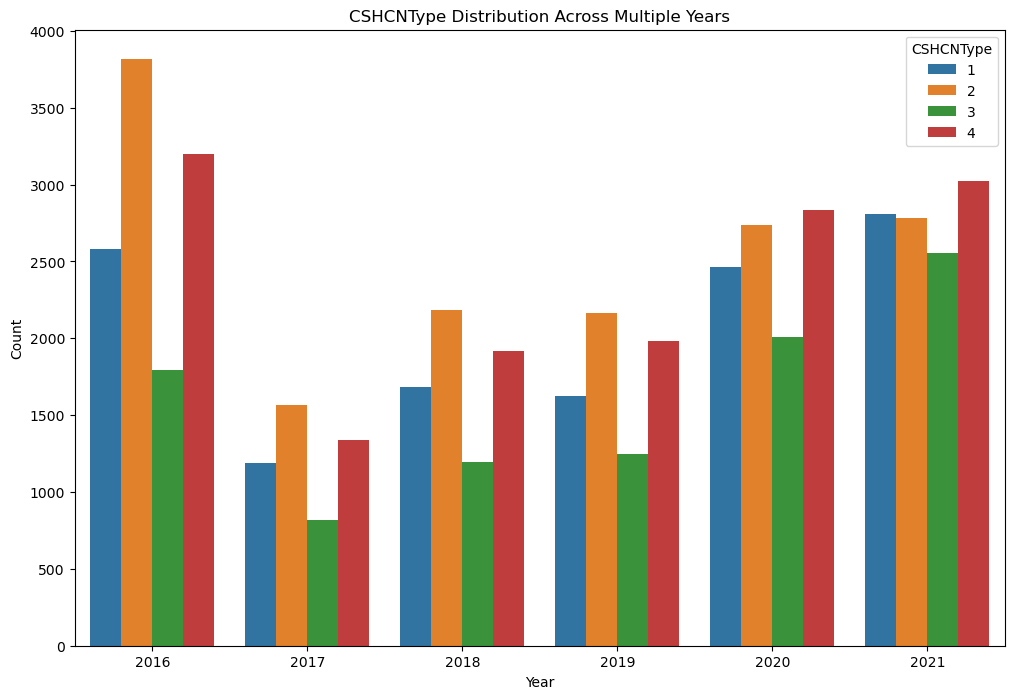

In [15]:

# Create a count plot to show 'CSHCNType' distribution across multiple years
filtered_df = df[df['CSHCNtype'] != 0]
plt.figure(figsize=(12, 8))
sns.countplot(x='YEAR', hue='CSHCNtype', data=filtered_df)
plt.title('CSHCNType Distribution Across Multiple Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='CSHCNType')
plt.show()


Percentage of Affected Children by CSHCNType Across Multiple Years
CSHCNtype         1         2         3         4
YEAR                                             
2016       5.136222  7.601769  3.572851  6.376962
2017       5.514144  7.236446  3.796472  6.194731
2018       5.509335  7.156895  3.907632  6.275794
2019       5.524411  7.352292  4.236741  6.740733
2020       5.757767  6.402974  4.694111  6.625056
2021       5.521497  5.464513  5.022400  5.943960




<Figure size 1200x800 with 0 Axes>

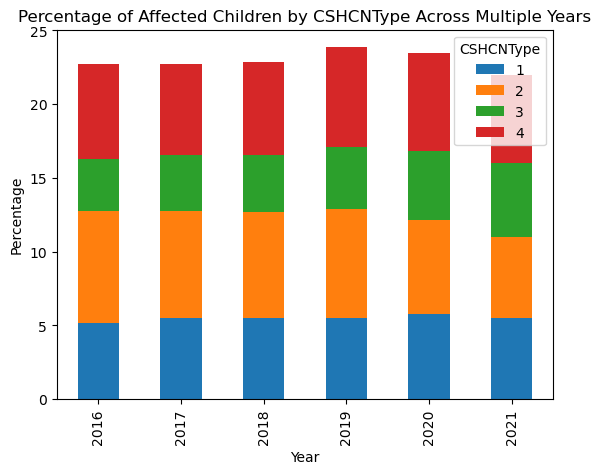

In [29]:
# Filter out rows where 'CSHCNtype' is 0
filtered_df = df[df['CSHCNtype'] != 0]

# Calculate the percentage of affected children for each 'CSHCNType' across years
percentage_by_type = (filtered_df.groupby(['YEAR', 'CSHCNtype']).size() / df.groupby('YEAR').size() * 100).unstack(fill_value=0)

print('Percentage of Affected Children by CSHCNType Across Multiple Years')
print(percentage_by_type)
print("\n")
# Create a stacked bar chart
plt.figure(figsize=(12, 8))
percentage_by_type.plot(kind='bar', stacked=True)
plt.title('Percentage of Affected Children by CSHCNType Across Multiple Years')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='CSHCNType')
plt.show()

Number of children affected by year - Real data 
YEAR
2016-01-01    11392
2017-01-01     4912
2018-01-01     6976
2019-01-01     7021
2020-01-01    10044
2021-01-01    11172
dtype: int64
Number of children affected by year - Survey(Real) + Forecasted data 
2016-01-01    11392.000000
2017-01-01     4912.000000
2018-01-01     6976.000000
2019-01-01     7021.000000
2020-01-01    10044.000000
2021-01-01    10658.959324
2022-01-01    13265.498835
2023-01-01    14224.893561
dtype: float64


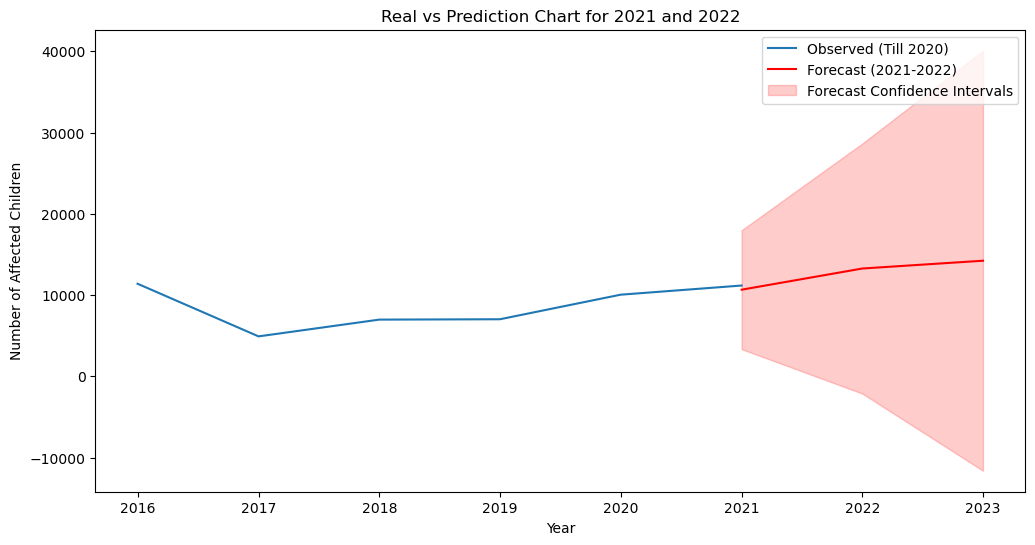

In [41]:
# Assuming your original DataFrame is named 'df' and has a 'YEAR' column
# Ensure the 'YEAR' column is of datetime type, if not, convert it
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

# Extract relevant columns and data only till 2020
#time_series_data = df[df['YEAR'] <= '2020'].groupby('YEAR')['Number of Affected Children'].sum()

# Extract relevant columns and data only for rows where SC_CSHCN is 1 and till 2020
time_series_data = df[(df['YEAR'] <= '2020') & (df['SC_CSHCN'] == 1)].groupby('YEAR').size()


time_series_data_full = df[(df['SC_CSHCN'] == 1)].groupby('YEAR').size()
print("Number of children affected by year - Real data ")
print(time_series_data_full)
# Assuming 'time_series_data' is your time series
differenced_series = time_series_data.diff().dropna()

# Define the ARIMA model
model = ARIMA(differenced_series, order=(1, 1, 1))  # Adjust order as needed

# Fit the model
model_fit = model.fit()

# Forecast for 2021, 2022, 2023
forecast_steps = 3  # Forecast for 2021 and 2022
forecast = model_fit.get_forecast(steps=forecast_steps)

# Extract forecast values and confidence intervals on the differenced scale
forecast_values_diff = forecast.predicted_mean
confidence_intervals_diff = forecast.conf_int()

# Integrate differencing to obtain forecast values and confidence intervals in the original scale
forecast_values = time_series_data.iloc[-1] + np.cumsum(forecast_values_diff)
confidence_intervals = time_series_data.iloc[-1] + np.cumsum(confidence_intervals_diff)


# Add the forecast values to the original time series
extended_time_series = time_series_data.append(forecast_values)
print("Number of children affected by year - Survey(Real) + Forecasted data ")
print(extended_time_series)

# Plot real vs prediction chart
plt.figure(figsize=(12, 6))
plt.plot(time_series_data_full.index, time_series_data_full, label='Observed (Till 2020)')
plt.plot(forecast_values.index, forecast_values, color='red', label='Forecast (2021-2022)')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='red', alpha=0.2, label='Forecast Confidence Intervals')
plt.title('Real vs Prediction Chart for 2021 and 2022')
plt.xlabel('Year')
plt.ylabel('Number of Affected Children')
plt.legend()
plt.show()